In [193]:
from manifold_learning import IMD
import numpy as np
from FastCCM import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from manifold_learning import imd_nd_smap
import importlib
importlib.reload(imd_nd_smap)

<module 'manifold_learning.imd_nd_smap' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/imd_nd_smap.py'>

In [2]:
def gaussian_kernel(x, y, sigma=1.0):
    return np.exp(-np.linalg.norm(x - y,axis=1)**2 / (2 * sigma**2))

In [3]:
X = get_truncated_lorenz_rand(400,n_steps=20000)

In [4]:
exp_kernel_grid = np.array(np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),6), np.linspace(X[:,2].min(),X[:,2].max(),6))).reshape(2,-1).T

In [5]:
X_ = [get_truncated_lorenz_rand(400,n_steps=20000)[:,[0,2]] for i in range(5)]
observables = np.concatenate([np.array([gaussian_kernel(x,e,sigma=15) for e in exp_kernel_grid]) for x in X_]).T

observables = StandardScaler().fit_transform(observables)

In [209]:
trainer = imd_nd_smap.IMD_nD_smap(observables.shape[1], embed_dim=2, n_components=5,subtract_corr=True, device="cuda")


In [210]:
trainer.fit(observables, sample_len=70, library_len=500, 
            exclusion_rad=20, omega=10, tp=32, 
            epochs=2000, num_batches=1,optimizer="Adagrad", learning_rate=0.01,tp_policy="range")


Epoch 1/2000, Loss: 1.2267
Epoch 2/2000, Loss: 1.2281
Epoch 3/2000, Loss: 1.2139
Epoch 4/2000, Loss: 1.2015
Epoch 5/2000, Loss: 1.1851
Epoch 6/2000, Loss: 1.1645
Epoch 7/2000, Loss: 1.1378
Epoch 8/2000, Loss: 1.0924
Epoch 9/2000, Loss: 1.0484
Epoch 10/2000, Loss: 1.0311
Epoch 11/2000, Loss: 0.9882
Epoch 12/2000, Loss: 0.9683
Epoch 13/2000, Loss: 0.9403
Epoch 14/2000, Loss: 0.9194
Epoch 15/2000, Loss: 0.8769
Epoch 16/2000, Loss: 0.8543
Epoch 17/2000, Loss: 0.8327
Epoch 18/2000, Loss: 0.8136
Epoch 19/2000, Loss: 0.8002
Epoch 20/2000, Loss: 0.8028
Epoch 21/2000, Loss: 0.7814
Epoch 22/2000, Loss: 0.7738
Epoch 23/2000, Loss: 0.7618
Epoch 24/2000, Loss: 0.7421
Epoch 25/2000, Loss: 0.7352
Epoch 26/2000, Loss: 0.7386
Epoch 27/2000, Loss: 0.7282
Epoch 28/2000, Loss: 0.7245
Epoch 29/2000, Loss: 0.7073
Epoch 30/2000, Loss: 0.6999
Epoch 31/2000, Loss: 0.6781
Epoch 32/2000, Loss: 0.6659
Epoch 33/2000, Loss: 0.6589
Epoch 34/2000, Loss: 0.6448
Epoch 35/2000, Loss: 0.6426
Epoch 36/2000, Loss: 0.6482
E

KeyboardInterrupt: 

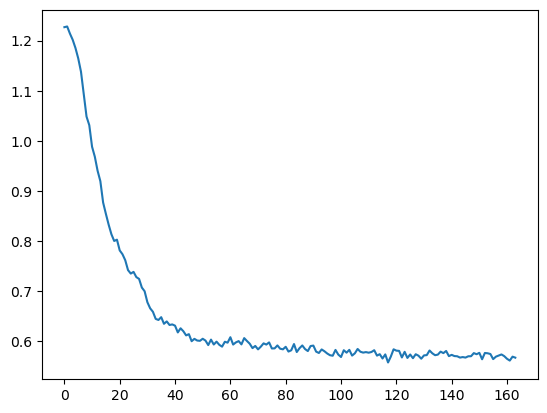

In [211]:
plt.plot(trainer.get_loss_history()[:])


In [212]:

unmixed = trainer.predict(observables)

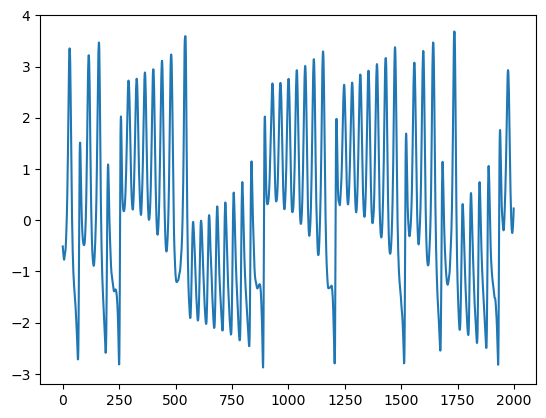

In [213]:

plt.plot(unmixed[:2000,0,0])

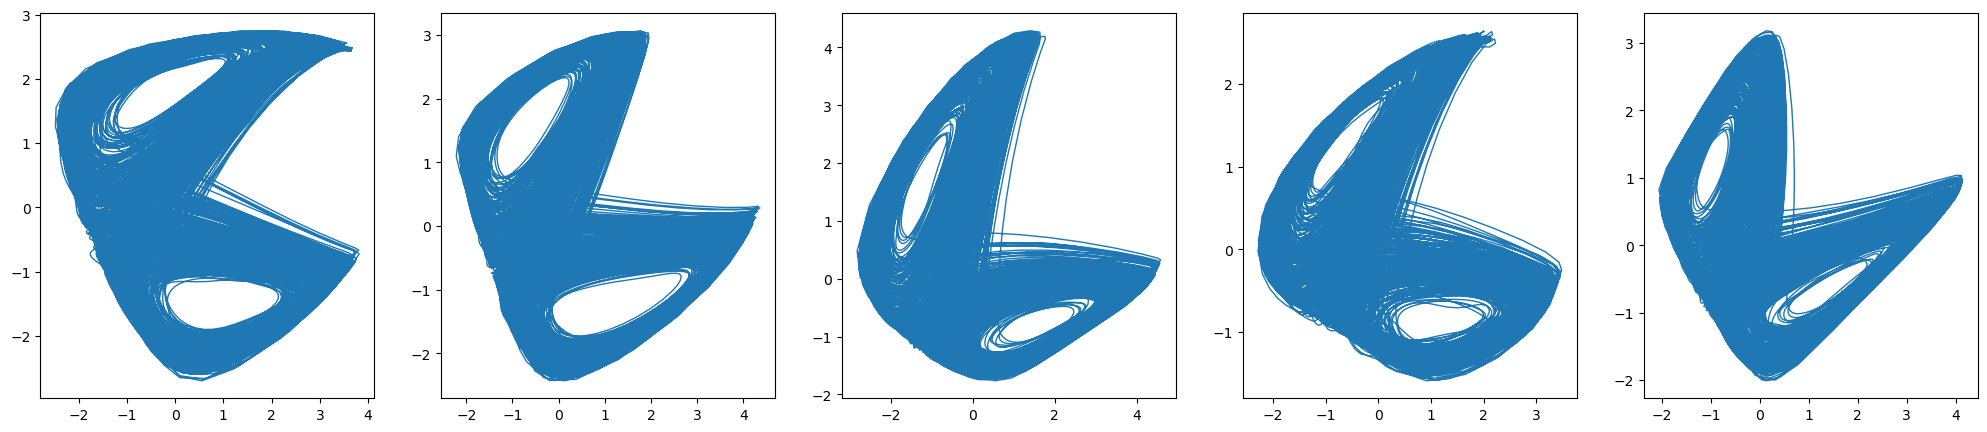

In [214]:
plt.figure(figsize=(5*unmixed.shape[1],5))
for i in range(unmixed.shape[1]):
    plt.subplot(1,unmixed.shape[1],i+1)
    x_pca = PCA(2).fit_transform(unmixed[:,i,:])
    plt.plot(x_pca[:,0],x_pca[:,1],linewidth=1)

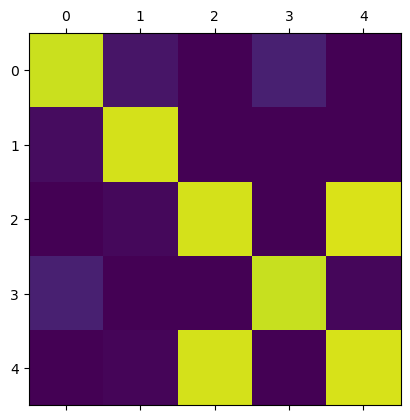

In [215]:
plt.matshow(CCM.PairwiseCCM().compute(np.transpose(unmixed,axes=(1,0,2)),np.transpose(unmixed,axes=(1,0,2)),1500,400,60,30,20).mean(axis=0),vmin=0,vmax=1)